# CAP 5610 - Introduction to Machine Learning <br>Florida International University - Summer 2020
## Problem Set #3
### Instructions:

Please answer the questions below. Copy this notebook and submit your answers under each problem, inserting cells as needed. You may use a combination of [python](http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Running%20Code.html), [markdown](http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html), and [LaTex](http://data-blog.udacity.com/posts/2016/10/latex-primer/) to formulate your responses. Please add your initials to the file name prior to submission. For example, if your name is Juana Perez, you would use the following filename: problem_set_3_JP.ipynb. Prior to completing this assignment, you should brush up on [calculus](https://www.khanacademy.org/math/calculus-home) and [linear algebra](https://www.khanacademy.org/math/linear-algebra).

#### Problem 1. **[10 points]** Artificial Neural Networks

Suppose that we have the following dataset:

(-1.6741733687074014,
 2.682848079571461,
 -1.1131663143728239,
 1.6289190474288073)

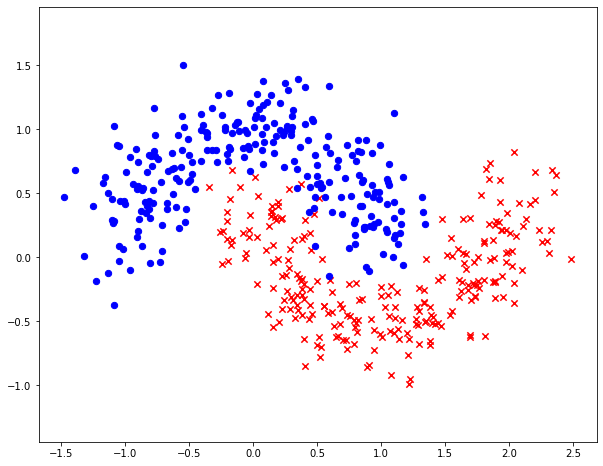

In [1]:
%matplotlib widget
%matplotlib inline
import numpy as np
from sklearn.datasets import make_circles, make_moons
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

X, y = make_moons(500, noise=0.2, random_state=42)
plt.scatter(X[:,0][y==1], X[:,1][y==1], s=40, marker='x',c='red')
plt.scatter(X[:,0][y==0], X[:,1][y==0], s=40, marker='o',c='blue')
plt.axis('equal')

Here, $X=\{x^{(1)},x^{(2)}, \dots,x^{(m)}  \}$ and $x^{(i)} \in \mathbb{R}$ where each sample has two features. Each sample is labeled into two categories with labels $y^{(i)} \in \{0,1\}$. The ANN that we will use here is a simple 3 layer network, with 2 neurons in the input layer, 2 neurons in the hidden layer, and 1 neuron in the output layer. Suppose that we use the mean square error (MSE), as the loss function to optimize the network. Recall that the MSE is

$$ \mathcal{L}(\hat{y},y)=\frac{1}{m} \sum_{i=1}^{m}(\hat{y}^{(i)} - y^{(i)})^2$$

a) For this ANN, suppose that the activation function used is a tanh activation function. What is the gradient descent update for the output layer, layer 2, that is:

$$\frac{\partial\mathcal{L}}{\partial \mathbf{W}^{[\ell]}} = \text{?}$$

where $\ell = 2$.

$$
\frac{\partial\mathcal{L}}{\partial \mathbf{W}^{[2]}} = 
\frac{\partial\mathcal{L}}{\partial \mathbf{a}^{[3]}}
\frac{\partial\mathcal{a}^{[3]}}{\partial \mathbf{z}^{[3]}}
\frac{\partial\mathcal{z}^{[3]}}{\partial \mathbf{a}^{[2]}}
\frac{\partial\mathcal{a}^{[2]}}{\partial \mathbf{z}^{[2]}}
\frac{\partial\mathcal{z}^{[2]}}{\partial \mathbf{W}^{[2]}}
$$

$$\mathbf{z}^{[2]} = \mathbf{W}^{[2]}\mathbf{a}^{[1]} + \mathbf{b}^{[2]}$$
$$\frac{\partial\mathbf{z}^{[2]}}{\partial \mathbf{W}^{[2]}} = \frac{\partial}{\partial \mathbf{W}^{[2]}}(\mathbf{W}^{[2]}\mathbf{a}^{[1]} + \mathbf{b}^{[2]}) = \mathbf{a}^{[1]}$$

$$\mathbf{a}^{[2]} = g(\mathbf{z}^{[2]}) = \frac{e^{z^{[2]}} - e^{-z^{[2]}}}{e^{z^{[2]}} + e^{-z^{[2]}}}$$
$$\frac{\partial\mathbf{a}^{[2]}}{\partial \mathbf{z}^{[2]}} = 1 - (\frac{e^{z^{[2]}} - e^{-z^{[2]}}}{e^{z^{[2]}} + e^{-z^{[2]}}})^2$$

$$\frac{\partial\mathbf{z}^{[3]}}{\partial \mathbf{a}^{[2]}} = {\mathbf{W}^{[3]}}$$

$$\frac{\partial\mathbf{a}^{[3]}}{\partial \mathbf{z}^{[3]}} = 1 - (\frac{e^{z^{[3]}} - e^{-z^{[3]}}}{e^{z^{[3]}} + e^{-z^{[3]}}})^2$$

$$\mathcal{L}(\hat{y},y) = \frac{1}{m} \sum_{i=1}^{m}(\hat{y}^{(i)} - {y}^{(i)})^2$$

$$\hat{y} = \mathbf{a}^{[3]}$$

$$\mathcal{L}(\hat{y},y) = \frac{1}{m} \sum_{i=1}^{m}({a}^{[3]} - {y}^{(i)})^2$$

$$\frac{\partial\mathcal{L}}{\partial \mathbf{a}^{[3]}} = \frac{2}{m} \sum_{i=1}^{m}({a}^{[3]} - {y}^{(i)})$$

$$Answer$$

$$\frac{\partial\mathcal{L}}{\partial \mathbf{W}^{[\ell]}} = (\frac{2}{m} \sum_{i=1}^{m}({a}^{[3]} - {y}^{(i)})) * (1 - (\frac{e^{z^{[3]}} - e^{-z^{[3]}}}{e^{z^{[3]}} + e^{-z^{[3]}}})^2) * ({\mathbf{W}^{[3]}}) * (1 - (\frac{e^{z^{[2]}} - e^{-z^{[2]}}}{e^{z^{[2]}} + e^{-z^{[2]}}})^2) * (\mathbf{a}^{[1]})$$

b) Suppose now that we use the rectified linear unit, or ReLU as the activation function.

$$ReLU: f(x) = \begin{cases} 
      x & x\gt 0 \\
      0 & otherwise 
   \end{cases}
$$

Find the gradient descent update for $\ell = 2$.

$$
\frac{\partial\mathcal{L}}{\partial \mathbf{W}^{[2]}} = 
\frac{\partial\mathcal{L}}{\partial \mathbf{a}^{[3]}}
\frac{\partial\mathcal{a}^{[3]}}{\partial \mathbf{z}^{[3]}}
\frac{\partial\mathcal{z}^{[3]}}{\partial \mathbf{a}^{[2]}}
\frac{\partial\mathcal{a}^{[2]}}{\partial \mathbf{z}^{[2]}}
\frac{\partial\mathcal{z}^{[2]}}{\partial \mathbf{w}^{[2]}}
$$

$$\mathbf{z}^{[2]} = \mathbf{W}^{[2]}\mathbf{a}^{[1]} + \mathbf{b}^{[2]}$$
$$\frac{\partial\mathbf{z}^{[2]}}{\partial \mathbf{W}^{[2]}} = \frac{\partial}{\partial \mathbf{W}^{[2]}}(\mathbf{W}^{[2]}\mathbf{a}^{[1]} + \mathbf{b}^{[2]}) = \mathbf{a}^{[1]}$$

$$\mathbf{a}^{[2]} = f(\mathbf{z}^{[2]}) = 
\begin{cases}
  \mathbf{z}^{[2]} \quad \mathbf{z}^{[2]} > 0\\ 
  0 \quad otherwise
\end{cases}
$$

$$\frac{\partial\mathbf{a}^{[2]}}{\partial \mathbf{z}^{[2]}} =
\begin{cases}
  1 \quad \mathbf{z}^{[2]} > 0\\
  0 \quad otherwise
\end{cases}
$$

$$\frac{\partial\mathbf{z}^{[3]}}{\partial \mathbf{a}^{[2]}} = {\mathbf{W}^{[3]}}$$

$$\mathbf{a}^{[3]} = f(\mathbf{z}^{[3]}) =
\begin{cases}
  \mathbf{z}^{[2]} \quad \mathbf{z}^{[3]} > 0\\
  0 \quad otherwise
\end{cases}
$$

$$\frac{\partial\mathbf{a}^{[3]}}{\partial \mathbf{z}^{[3]}} =
\begin{cases}
  1 \quad \mathbf{z}^{[3]} > 0\\
  0 \quad otherwise
\end{cases}
$$

$$\mathcal{L}(\hat{y}, y) = \frac{1}{\mathbf{m}} \displaystyle\sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})^{2}$$

$$\hat{y} = \mathbf{a}^{[3]}$$

$$\mathcal{L}(\hat{y}, y) = \frac{1}{\mathbf{m}} \displaystyle\sum_{i=1}^{m} (\mathbf{a}^{[3]} - y^{(i)})^{2}$$

$$\frac{\partial\mathcal{L}}{\partial \mathbf{a}^{[3]}} = \frac{2}{\mathbf{m}} \displaystyle\sum_{i=1}^{m} (\mathbf{a}^{[3]} - y^{(i)})$$

$$Answer$$

\begin{cases}
  (\frac{2}{\mathbf{m}} \displaystyle\sum_{i=1}^{m} (\mathbf{a}^{[3]} - y^{(i)})) * (1) * (\mathbf{W}^{[2]}) * (1) * (\mathbf{a}^{[1]}) \quad \mathbf{z}^{[2]}, \mathbf{z}^{[3]} > 0\\
  0 \quad otherwise
\end{cases}

#### Problem 2. **[10 points]** PyTorch

Implement a neural network in pytorch to classify the dataset from problem 1. Please be sure to show your training progress, as well as the decision boundary as part of your solution. Select the model architecture, activation functions, and loss functions that lead to a classifier with at least 90% accuracy.

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from IPython.core.debugger import set_trace

In [3]:
image_folder = './images'

transformer = transforms.Compose([transforms.ToTensor(),
                                 transforms.Normalize((0.5,),(1.0,))])

train_set = datasets.MNIST(root=image_folder, train=True, transform=transformer, download=True)
test_set = datasets.MNIST(root=image_folder, train=False, transform=transformer, download=True)

batch_size = 64

train_loader = torch.utils.data.DataLoader(dataset=train_set,
                                         batch_size=batch_size,
                                         shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_set,
                                         batch_size=batch_size,
                                         shuffle=False)

In [4]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 500)
        self.fc2 = nn.Linear(500, 256)
        self.fc3 = nn.Linear(256, 10)
        
    def forward(self, x):
        x = x.view(-1, 28*28)
        x1 = F.relu(self.fc1(x))
        x2 = F.relu(self.fc2(x1))
        x3 = self.fc3(x2)
#         set_trace()
        return F.log_softmax(x3,1)
    
    def name(self):
        return "MLP"

In [5]:
model = MLP()

optimizer = optim.SGD(model.parameters(), lr=0.01)

criterion = nn.CrossEntropyLoss()

for epoch in range(20):
    correct_cnt, ave_loss = 0, 0
    total_cnt = 0
    for batch_idx, (x, target) in enumerate(train_loader):
        optimizer.zero_grad()
        out = model(x)
        loss = criterion(out, target)
        _, pred_label = torch.max(out.data, 1)
        total_cnt += x.shape[0]
        correct_cnt+= (pred_label == target).sum().item()
        ave_loss = ave_loss * 0.9 + loss.item() * 0.1
        loss.backward()
        optimizer.step()
        if (batch_idx+1) % 100 == 0 or (batch_idx+1) == len(train_loader):
            print('==>>> epoch: {}, batch index: {}, train loss: {:.6f}, acc: {:.3f}'.format(
                epoch, batch_idx+1, ave_loss, correct_cnt*1.0/total_cnt))
    # testing
    correct_cnt, ave_loss = 0, 0
    total_cnt = 0
    for batch_idx, (x, target) in enumerate(test_loader):
        out = model(x)
        loss = criterion(out, target)
        _, pred_label = torch.max(out.data, 1)
        total_cnt += x.shape[0]
#         print(target.data)
        correct_cnt += (pred_label == target).sum().item()
        # smooth average
        ave_loss = ave_loss * 0.9 + loss.item() * 0.1
        
        if(batch_idx+1) % 100 == 0 or (batch_idx+1) == len(test_loader):
            print('==>>> epoch: {}, batch index: {}, test loss: {:.6f}, acc: {:.3f}'.format(
                epoch, batch_idx+1, ave_loss, correct_cnt * 1.0 / total_cnt))

==>>> epoch: 0, batch index: 100, train loss: 2.240538, acc: 0.229
==>>> epoch: 0, batch index: 200, train loss: 2.151059, acc: 0.306
==>>> epoch: 0, batch index: 300, train loss: 1.985168, acc: 0.387
==>>> epoch: 0, batch index: 400, train loss: 1.714931, acc: 0.441
==>>> epoch: 0, batch index: 500, train loss: 1.338181, acc: 0.489
==>>> epoch: 0, batch index: 600, train loss: 1.089627, acc: 0.532
==>>> epoch: 0, batch index: 700, train loss: 0.879668, acc: 0.570
==>>> epoch: 0, batch index: 800, train loss: 0.772881, acc: 0.600
==>>> epoch: 0, batch index: 900, train loss: 0.639917, acc: 0.626
==>>> epoch: 0, batch index: 938, train loss: 0.649816, acc: 0.634
==>>> epoch: 0, batch index: 100, test loss: 0.518734, acc: 0.819
==>>> epoch: 0, batch index: 157, test loss: 0.593601, acc: 0.839
==>>> epoch: 1, batch index: 100, train loss: 0.543528, acc: 0.853
==>>> epoch: 1, batch index: 200, train loss: 0.509973, acc: 0.855
==>>> epoch: 1, batch index: 300, train loss: 0.481805, acc: 0.8

==>>> epoch: 10, batch index: 400, train loss: 0.244626, acc: 0.938
==>>> epoch: 10, batch index: 500, train loss: 0.226016, acc: 0.939
==>>> epoch: 10, batch index: 600, train loss: 0.235208, acc: 0.938
==>>> epoch: 10, batch index: 700, train loss: 0.196289, acc: 0.938
==>>> epoch: 10, batch index: 800, train loss: 0.206338, acc: 0.938
==>>> epoch: 10, batch index: 900, train loss: 0.200532, acc: 0.939
==>>> epoch: 10, batch index: 938, train loss: 0.224380, acc: 0.939
==>>> epoch: 10, batch index: 100, test loss: 0.177571, acc: 0.928
==>>> epoch: 10, batch index: 157, test loss: 0.206623, acc: 0.939
==>>> epoch: 11, batch index: 100, train loss: 0.203974, acc: 0.942
==>>> epoch: 11, batch index: 200, train loss: 0.202953, acc: 0.944
==>>> epoch: 11, batch index: 300, train loss: 0.172436, acc: 0.943
==>>> epoch: 11, batch index: 400, train loss: 0.233870, acc: 0.943
==>>> epoch: 11, batch index: 500, train loss: 0.196800, acc: 0.942
==>>> epoch: 11, batch index: 600, train loss: 0.1

#### Problem 3. **[10 points]** Convolutional Neural Networks

a) Modify the code from example set 5 to create a convolutional neural network to classify the notMNIST dataset. You can download the dataset [here](https://www.kaggle.com/lubaroli/notmnist). Please be sure to include some type of validation/testing as part of your solution, i.e. train/test split or cross-validation.

In [10]:
import torch.nn as nn
import torch
import torch.nn.functional as F
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
from PIL import Image
from torch.utils.data.dataset import Dataset
from imageio import imread
from torch import Tensor
from torch.utils.data import DataLoader

In [11]:
class notMNIST(Dataset):

    # The init method is called when this class will be instantiated.
    def __init__(self, root):
        Images, Y = [], []
        folders = os.listdir(root)

        for folder in folders:
            folder_path = os.path.join(root, folder)
            for ims in os.listdir(folder_path):
                try:
                    img_path = os.path.join(folder_path, ims)
                    Images.append(np.array(imread(img_path)))
                    Y.append(ord(folder) - 65)  # Folders are A-J so labels will be 0-9
                except:
                    # Some images in the dataset are damaged
                    print("File {}/{} is broken".format(folder, ims))
        data = [(x, y) for x, y in zip(Images, Y)]
        self.data = data

    # The number of items in the dataset
    def __len__(self):
        return len(self.data)

    # The Dataloader is a generator that repeatedly calls the getitem method.
    # getitem is supposed to return (X, Y) for the specified index.
    def __getitem__(self, index):
        img = self.data[index][0]

        # 8 bit images. Scale between [0,1]. This helps speed up our training
        img = img.reshape(28, 28) / 255.0

        # Input for Conv2D should be Channels x Height x Width
        img_tensor = Tensor(img).view(1, 28, 28).float()
        label = self.data[index][1]
        return (img_tensor, label)

In [12]:
class Model(torch.nn.Module):

    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))

        # Reshaping the tensor to BATCH_SIZE x 320. Torch infers this from other dimensions when one of the parameter is -1.
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x)
        x = self.fc2(x)
        return x

File A/RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png is broken
File F/Q3Jvc3NvdmVyIEJvbGRPYmxpcXVlLnR0Zg==.png is broken
Loaded data
Epoch 1, loss 1.6916424203926408
Epoch 2, loss 0.9842994557300084
Epoch 3, loss 0.7955267975028132
Epoch 4, loss 0.7028063955441327
Epoch 5, loss 0.6562138166226131
Epoch 6, loss 0.6165894672904216
Epoch 7, loss 0.5911599212968853
Epoch 8, loss 0.5697586007521186
Epoch 9, loss 0.5442940038694463
Epoch 10, loss 0.5159632328530432
Saved model...


c:\users\josh\miniconda3\lib\site-packages\torch\serialization.py:402: UserWarning: Couldn't retrieve source code for container of type Model. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


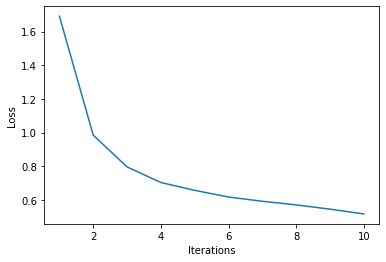

In [13]:
MODEL_NAME = 'conv2_layer_28x28'
BATCH_SIZE = 256
N_EPOCHS = 10


train_dataset = notMNIST('./Dataset/Train')
print("Loaded data")

# Creating a dataloader
train_loader = DataLoader(dataset=train_dataset, batch_size=256, shuffle=True)

# Instantiating the model, loss function and optimizer
net = Model()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters())

loss_history = []


def train(epoch):
    epoch_loss = 0
    n_batches = len(train_dataset) // BATCH_SIZE

    for step, data in enumerate(train_loader, 0):
        train_x, train_y = data
        y_hat = net.forward(train_x)
        train_y = torch.Tensor(np.array(train_y))

        # CrossEntropyLoss requires arg2 to be torch.LongTensor
        loss = criterion(y_hat, train_y.long())
        epoch_loss += loss.item()
        optimizer.zero_grad()
        
        # Backpropagation
        loss.backward()
        optimizer.step()
        # There are len(dataset)/BATCH_SIZE batches.
        # We print the epoch loss when we reach the last batch.
        if step % n_batches == 0 and step != 0:
            epoch_loss = epoch_loss / n_batches
            loss_history.append(epoch_loss)
            print("Epoch {}, loss {}".format(epoch, epoch_loss))
            epoch_loss = 0


for epoch in range(1, N_EPOCHS + 1):
    train(epoch)

# Saving the model
torch.save(net, '{}.pt'.format(MODEL_NAME))
print("Saved model...")

# Plotting loss vs number of epochs
plt.plot(np.array(range(1, N_EPOCHS + 1)), loss_history)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

In [14]:
path = os.path.join('Dataset/Test')
test_dataset = notMNIST(path)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=True)
classifier = torch.load('{}.pt'.format(MODEL_NAME)).eval()
correct = 0

for _, data in enumerate(test_loader, 0):
    test_x, test_y = data
    pred = classifier.forward(test_x)
    y_hat = np.argmax(pred.data)
    if y_hat == test_y:
        correct += 1

print("Accuracy={}".format(correct / len(test_dataset)))

Accuracy=0.8431372549019608
